<a href="https://colab.research.google.com/github/AimanAminuddin/Gotta-Catch-Them-All-/blob/main/Gotta_Catch_Them_All.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Load Relevant Packages**

In [ ]:
!pip install keras_tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras # for building Neural Networks
print('Tensorflow/Keras: %s' % keras.__version__) # print version
from keras.models import Sequential # for creating a linear stack of layers for our Neural Network
from keras import Input # for instantiating a keras tensor
from keras.layers import Bidirectional, LSTM, RepeatVector, Dense, TimeDistributed,SimpleRNN,Flatten,GRU
# for creating layers inside the Neural Network
import keras_tuner as kt # for hyperparameter tuning  
print('keras_tuner: %s' % kt.__version__) # print version
# Data manipulation
import pandas as pd # for data manipulation
print('pandas: %s' % pd.__version__) # print version
import numpy as np # for data manipulation
print('numpy: %s' % np.__version__) # print version

# Callback functions
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard, ReduceLROnPlateau


# Sklearn
import sklearn
print('sklearn: %s' % sklearn.__version__) # print version
from sklearn.preprocessing import MinMaxScaler # for feature scaling

# Visualization
import plotly 
import plotly.express as px
import plotly.graph_objects as go
print('plotly: %s' % plotly.__version__) # print version

# To calculate time taken to train each model 
import time 

# Visualisation 
import seaborn as sns
print('seaborn: %s' % sns.__version__) # print version

import matplotlib
import matplotlib.pyplot as plt
print('matplotlib: %s' % matplotlib.__version__)

import plotly.io as pio
pio.renderers.default='notebook'

Tensorflow/Keras: 2.8.0
keras_tuner: 1.1.2
pandas: 1.3.5
numpy: 1.21.6
sklearn: 1.0.2
plotly: 5.5.0
seaborn: 0.11.2
matplotlib: 3.2.2


# **Load DataSet**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/dataset/pokemon_alopez247.csv"
data = pd.read_csv(path)
data

,Number,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
3,4,Charmander,Fire,NaN,309,39,52,43,60,50,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
4,5,Charmeleon,Fire,NaN,405,58,64,58,80,65,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
716,717,Yveltal,Dark,Flying,680,126,131,95,131,98,...,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
717,718,Zygarde,Dragon,Ground,600,108,100,121,81,95,...,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
718,719,Diancie,Rock,Fairy,600,50,100,150,100,150,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms
719,720,Hoopa,Psychic,Ghost,600,80,110,60,150,130,...,Purple,False,NaN,Undiscovered,NaN,False,0.51,9.0,3,head_only


# **Data Preprocessing**

In [ ]:
data = data.set_index('Number')
data

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Number,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
5,Charmeleon,Fire,NaN,405,58,64,58,80,65,80,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,...,Red,False,NaN,Undiscovered,NaN,False,5.79,203.0,45,two_wings
718,Zygarde,Dragon,Ground,600,108,100,121,81,95,95,...,Green,False,NaN,Undiscovered,NaN,False,5.00,305.0,3,serpentine_body
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,...,Pink,False,NaN,Undiscovered,NaN,True,0.71,8.8,3,head_arms


In [ ]:
data.columns 

Index(['Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary', 'Color',
       'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate',
       'Body_Style'],
      dtype='object')

**Find Columns with Missing Values**

In [ ]:
columns = data.columns[data.isnull().any()]
print("These columns have missing values")
for column in columns:
  print(column)

These columns have missing values
Type_2
Pr_Male
Egg_Group_2


In [ ]:
# Not all Pokemon have a secondary typing,gender,second egg group 
data['Type_2'] = data['Type_2'].fillna("No Second Typing")
data['Pr_Male'] = data['Pr_Male'].fillna(-1)
data['Egg_Group_2'] = data['Egg_Group_2'].fillna("No Secondary Egg Group")
data

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,Color,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style
Number,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,...,Green,True,0.875,Monster,Grass,False,0.71,6.9,45,quadruped
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,...,Green,True,0.875,Monster,Grass,False,0.99,13.0,45,quadruped
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,...,Green,True,0.875,Monster,Grass,True,2.01,100.0,45,quadruped
4,Charmander,Fire,No Second Typing,309,39,52,43,60,50,65,...,Red,True,0.875,Monster,Dragon,False,0.61,8.5,45,bipedal_tailed
5,Charmeleon,Fire,No Second Typing,405,58,64,58,80,65,80,...,Red,True,0.875,Monster,Dragon,False,1.09,19.0,45,bipedal_tailed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,...,Red,False,-1.000,Undiscovered,No Secondary Egg Group,False,5.79,203.0,45,two_wings
718,Zygarde,Dragon,Ground,600,108,100,121,81,95,95,...,Green,False,-1.000,Undiscovered,No Secondary Egg Group,False,5.00,305.0,3,serpentine_body
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,...,Pink,False,-1.000,Undiscovered,No Secondary Egg Group,True,0.71,8.8,3,head_arms


# **Exploratory Data Analysis**

**Determine if there are any correlation between variables**

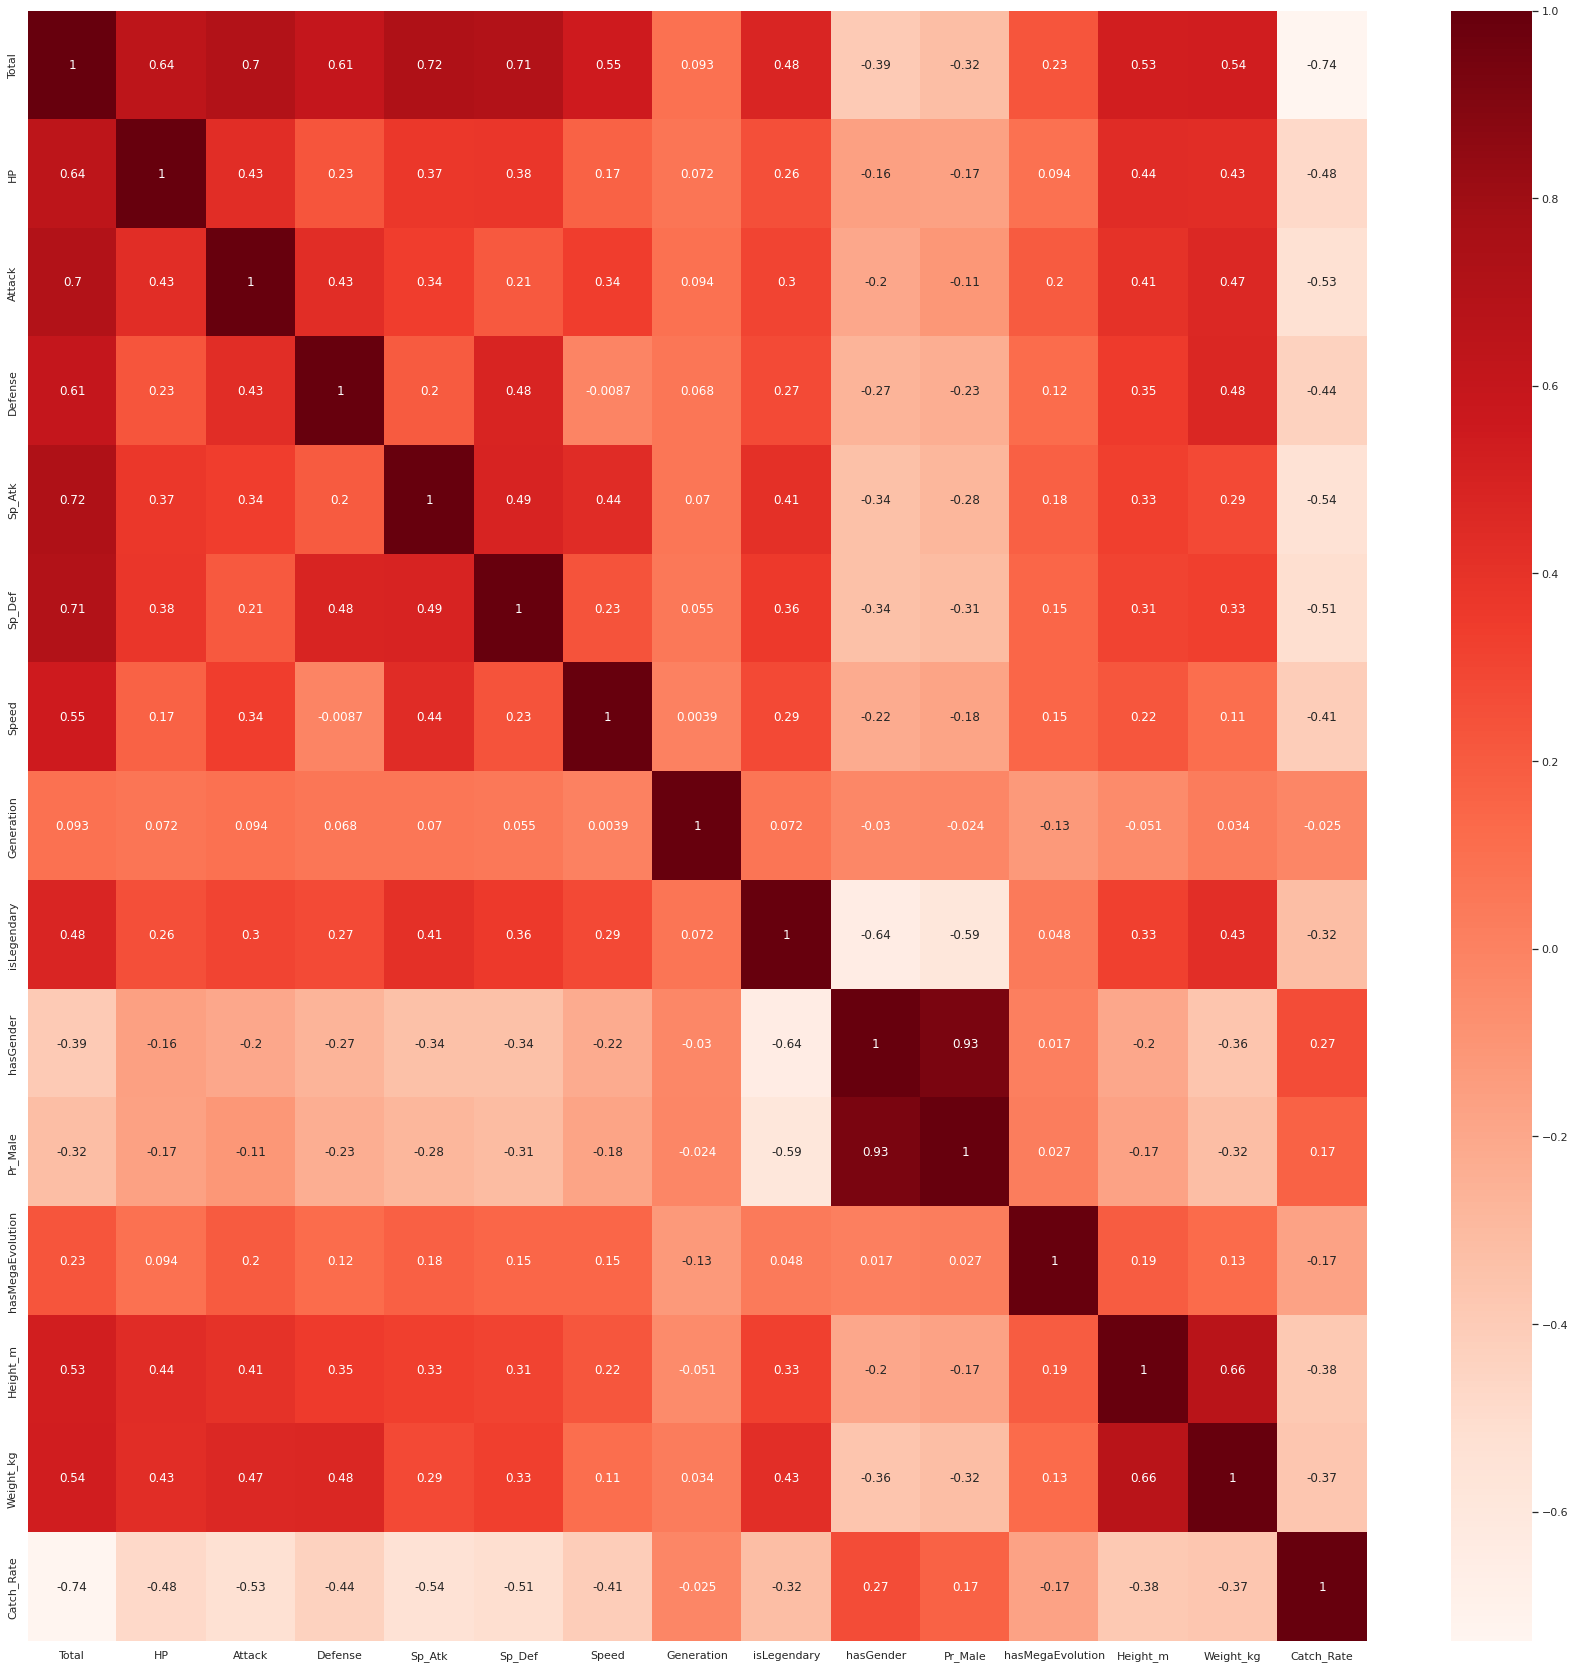

In [ ]:
'''
It is easy to see that Total is highly correlated to many variables. This is 
because it sums 
all the base stats 
(Health Points, Attack, Defense, Special Attack, Special Defense, and Speed)
'''
plt.figure(figsize=(30,30))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


**Numerical Variables**

In [ ]:
numerical_columns = data.describe().columns 
data.describe()

,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,Generation,Pr_Male,Height_m,Weight_kg,Catch_Rate
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,417.945908,68.380028,75.013870,70.808599,68.737864,69.291262,65.714286,3.323162,0.387483,1.144979,56.773370,100.246879
std,109.663671,25.848272,28.984475,29.296558,28.788005,27.015860,27.277920,1.669873,0.515952,1.044369,89.095667,76.573513
min,180.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.000000,-1.000000,0.100000,0.100000,3.000000
25%,320.000000,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,2.000000,0.500000,0.610000,9.400000,45.000000
50%,424.000000,65.000000,74.000000,65.000000,65.000000,65.000000,65.000000,3.000000,0.500000,0.990000,28.000000,65.000000
75%,499.000000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,5.000000,0.500000,1.400000,61.000000,180.000000
max,720.000000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,6.000000,1.000000,14.500000,950.000000,255.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

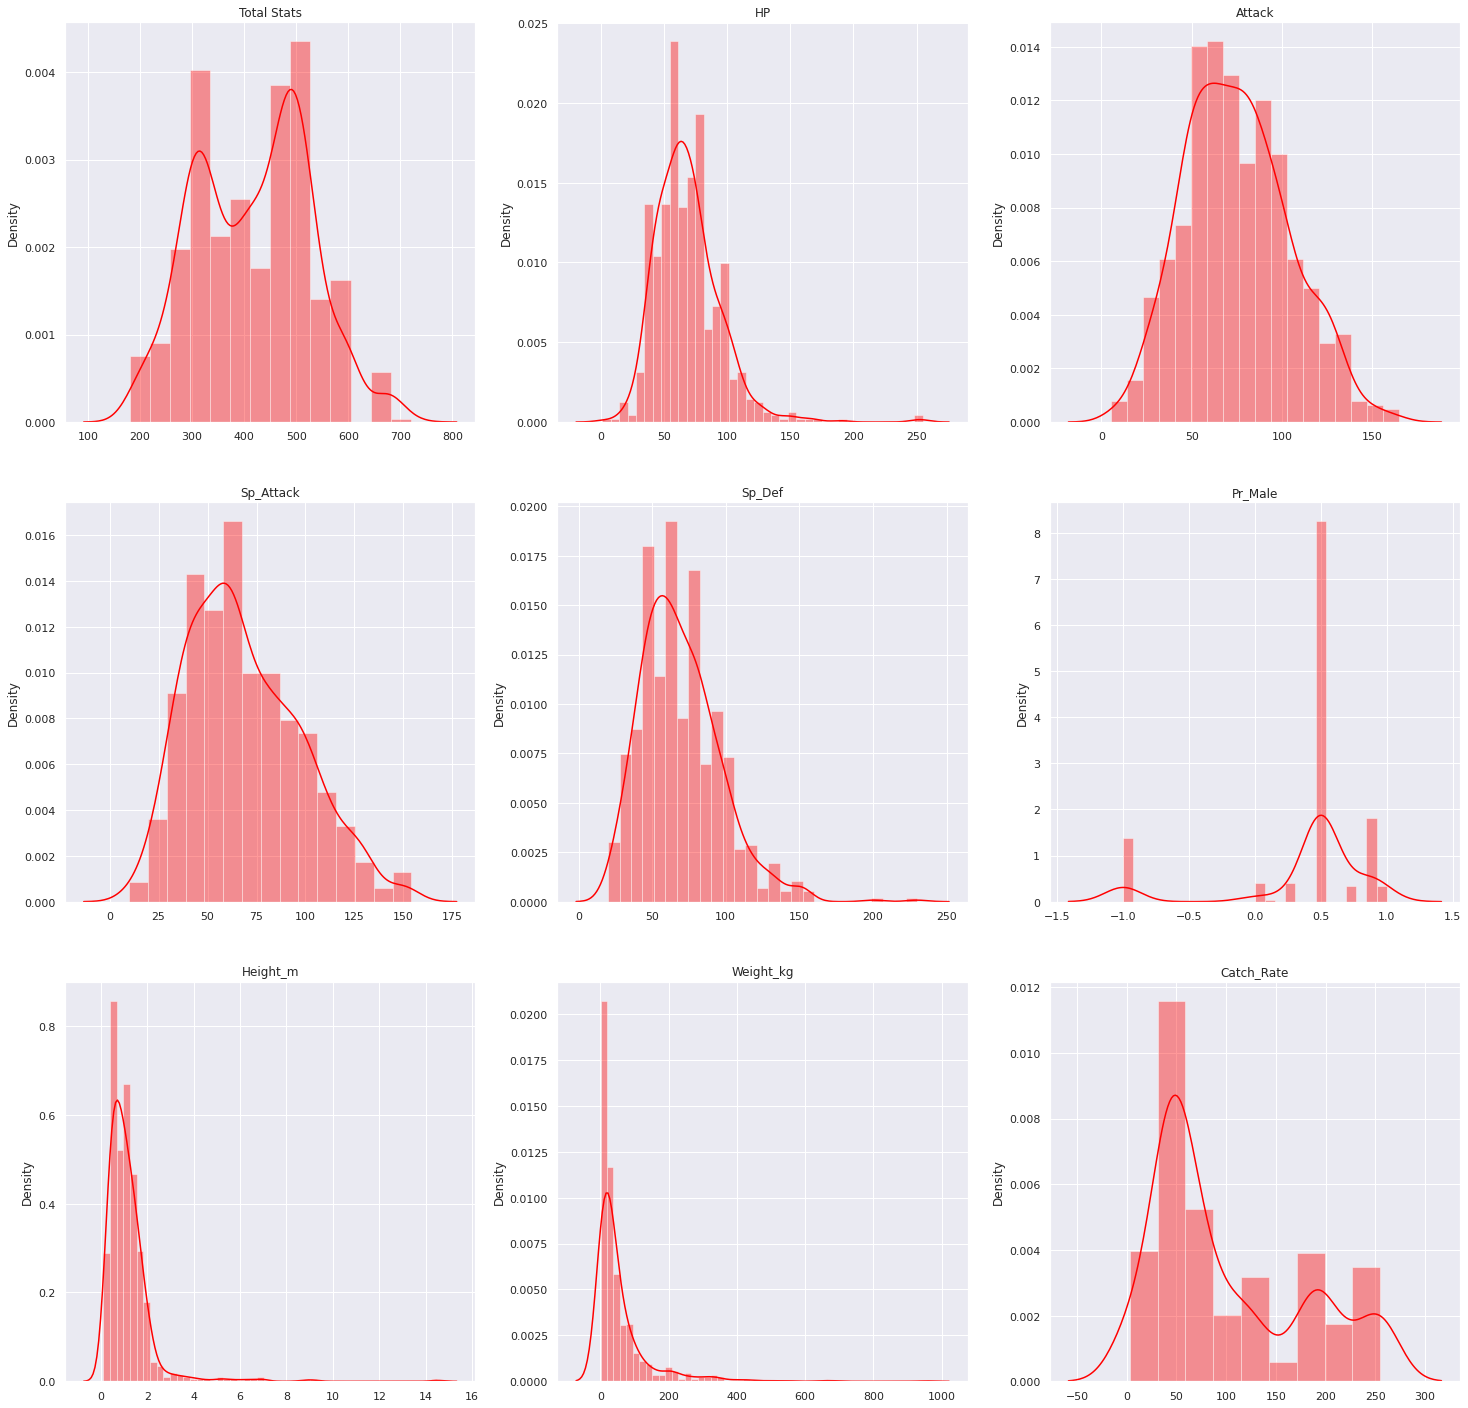

In [ ]:
Total = data['Total'].values 
HP = data['HP'].values 
Attack = data['Attack'].values 
Sp_Attack = data['Sp_Atk'].values 
Sp_Def = data['Sp_Def'].values 
Pr_Male = data['Pr_Male']
Height_m = data['Height_m'].values 
Weight_kg = data['Weight_kg'].values 
Catch_Rate = data['Catch_Rate'].values 


fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9)) = plt.subplots(nrows=3,ncols = 3)
fig.set_size_inches(25,25)

sns.distplot(x=Total,ax=ax1,color = 'red').set_title('Total Stats')
sns.distplot(x=HP,ax=ax2,color = 'red').set_title('HP')
sns.distplot(x=Attack,ax=ax3,color = 'red').set_title('Attack')
sns.distplot(x=Sp_Attack,ax=ax4,color = 'red').set_title('Sp_Attack')
sns.distplot(x=Sp_Def,ax=ax5,color = 'red').set_title('Sp_Def')
sns.distplot(x=Pr_Male,ax=ax6,color = 'red').set_title('Pr_Male')
sns.distplot(x=Height_m,ax=ax7,color = 'red').set_title('Height_m')
sns.distplot(x=Weight_kg,ax=ax8,color = 'red').set_title('Weight_kg')
sns.distplot(x=Catch_Rate,ax=ax9,color = 'red').set_title('Catch_Rate')
fig.show()

**Plot the distribution of variables**

**Type 1 & Type 2**

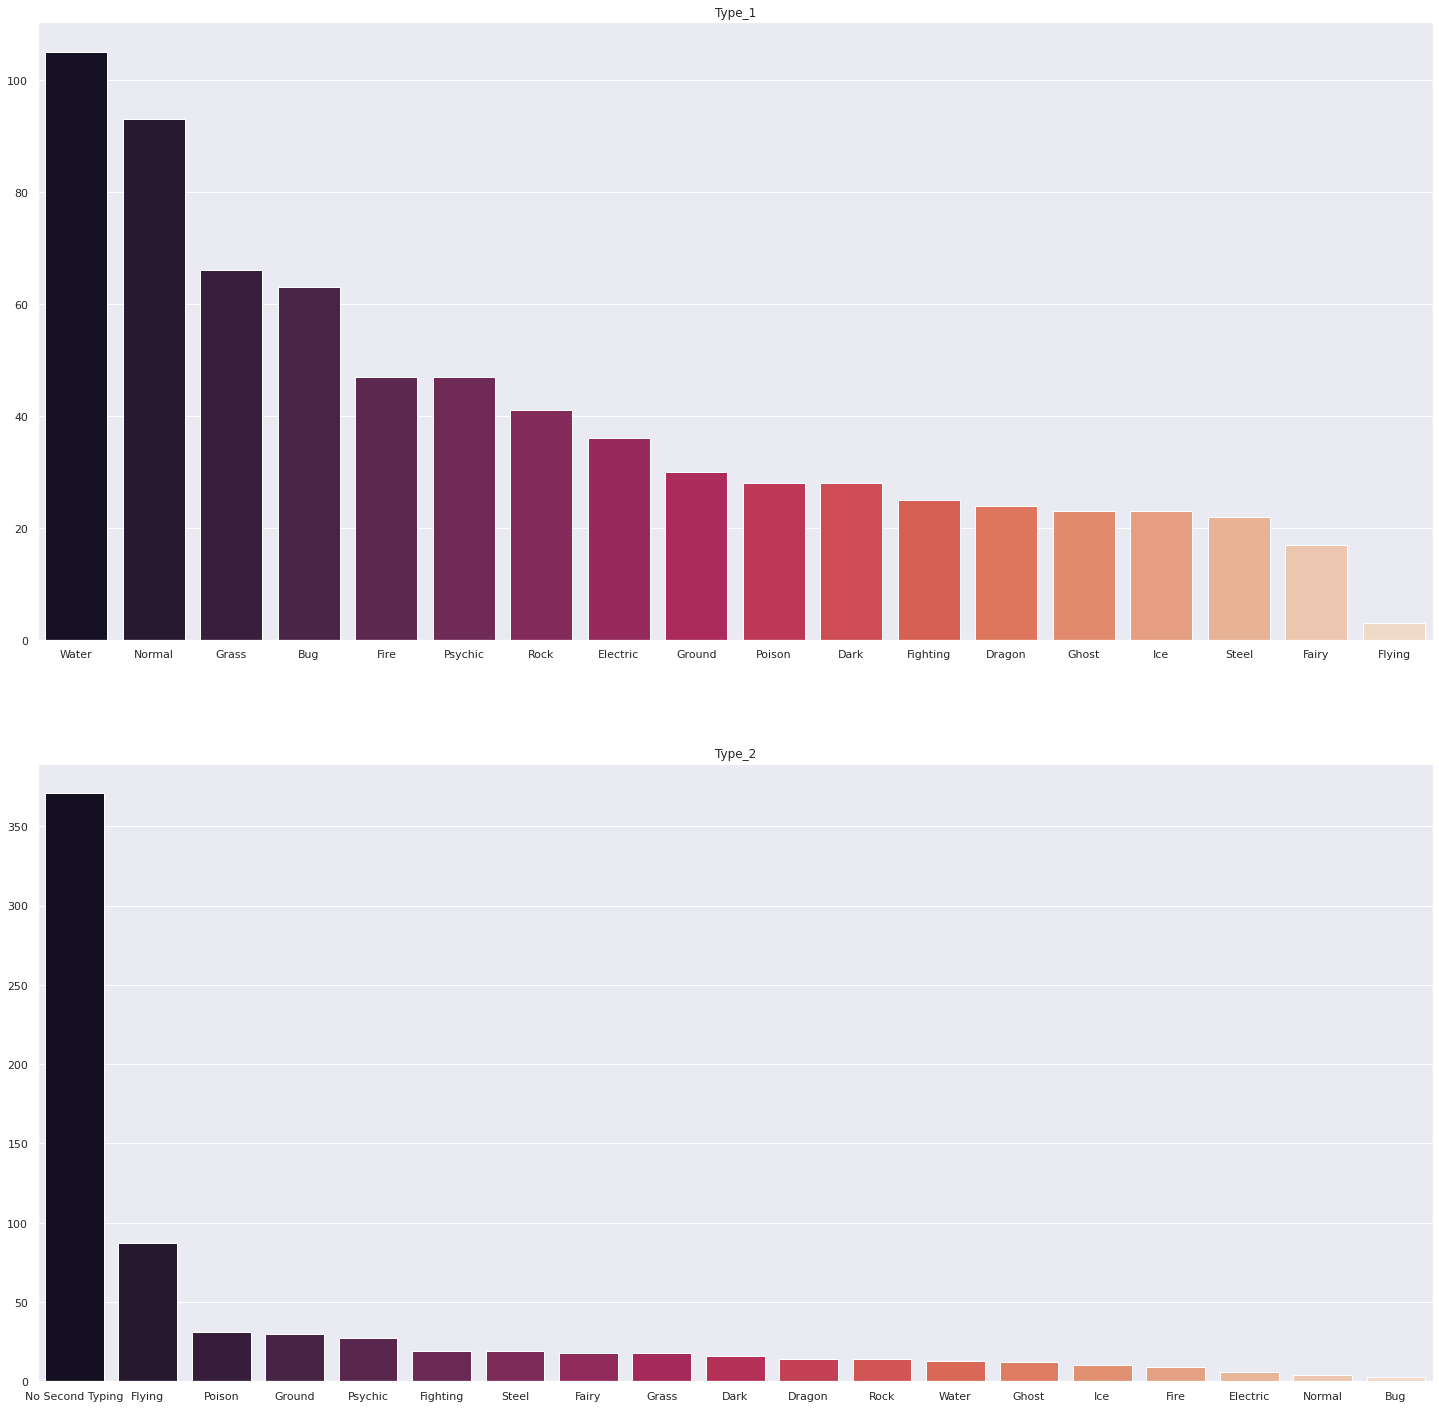

In [ ]:
# Count the number of each type 
type1 = data['Type_1'].value_counts()

type2 = data['Type_2'].value_counts()

fig1, (ax1,ax2) = plt.subplots(nrows=2)

fig1.set_size_inches(25,25)
# using seaborn barplot to visualize Type_1 and Type_2 
sns.barplot(x=type1.index,y=type1.values, ax= ax1,palette='rocket').set_title('Type_1')
sns.barplot(x=type2.index,y=type2.values, ax= ax2,palette='rocket').set_title('Type_2')
sns.set_theme(style='darkgrid')
fig1.show()

**Egg Group 1 & 2**

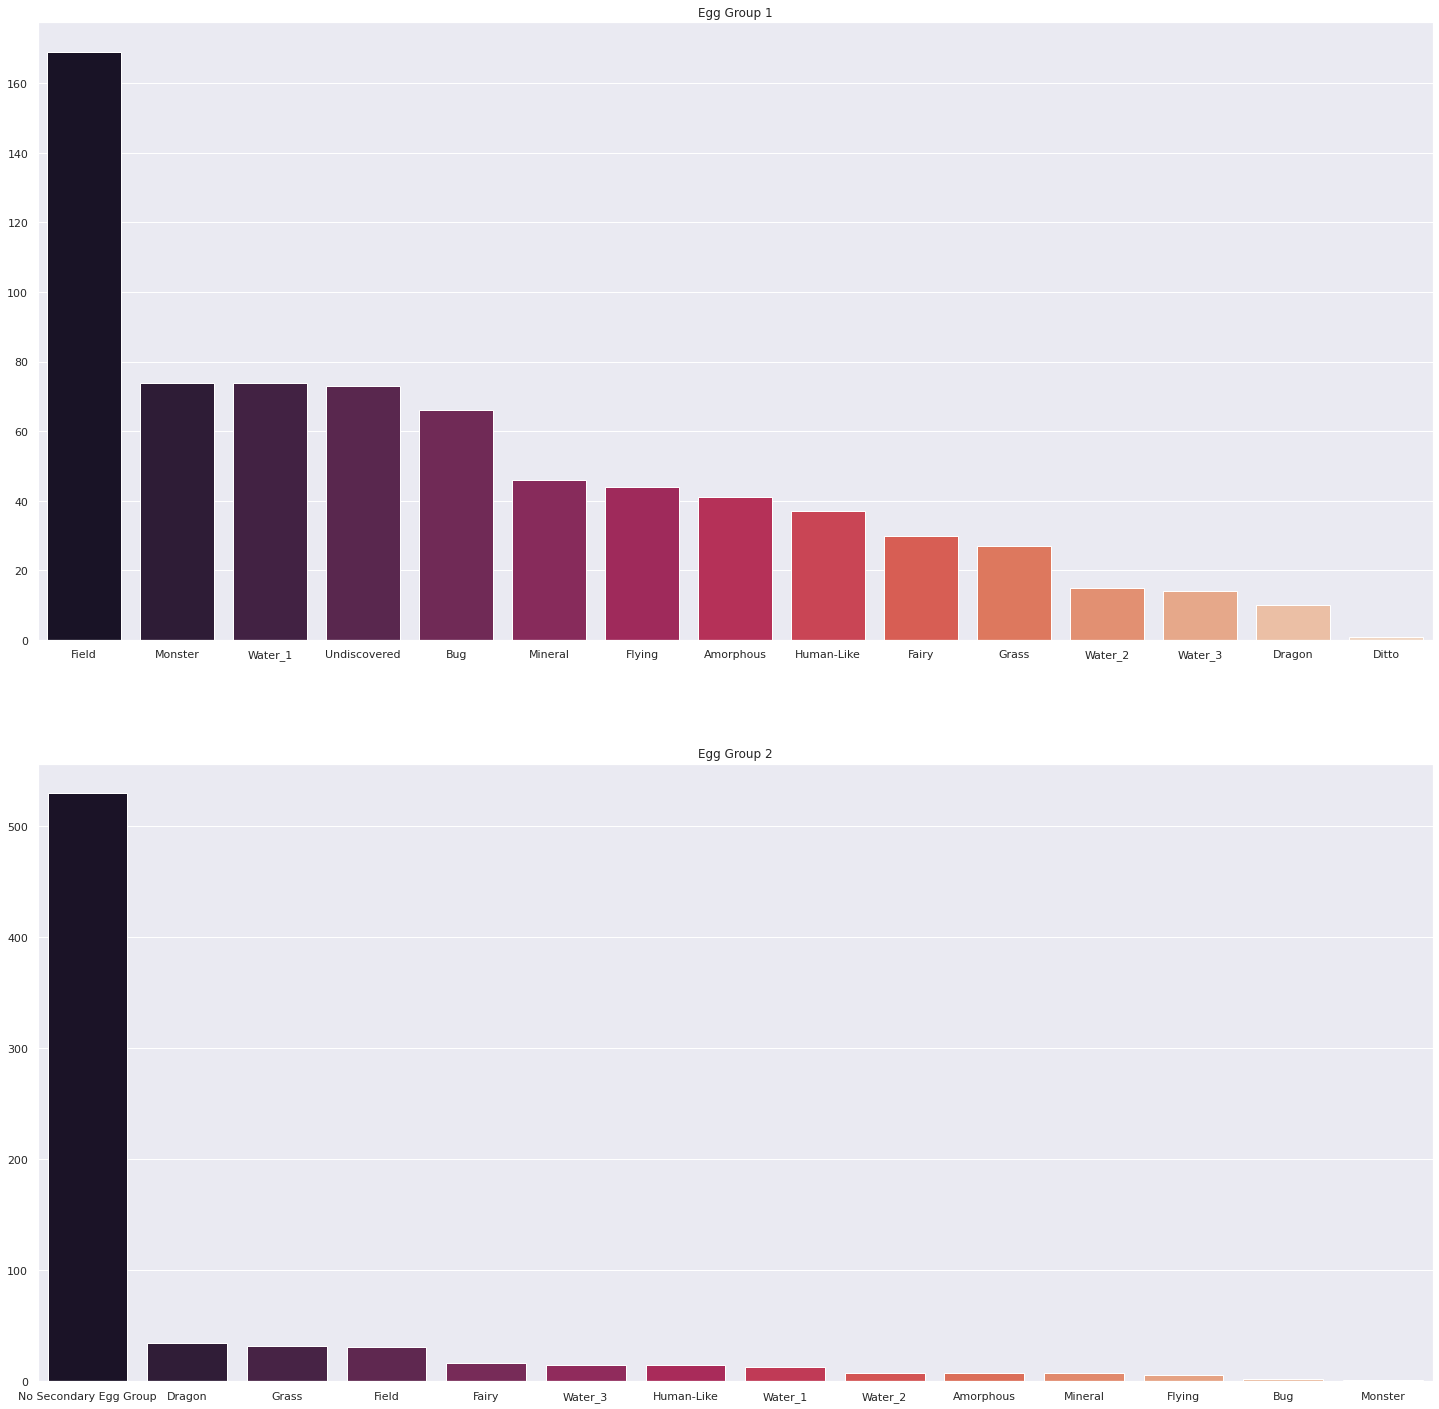

In [ ]:
# Count the number of each type 
egg_group1 = data['Egg_Group_1'].value_counts()

egg_group2 = data['Egg_Group_2'].value_counts()

fig2, (ax3,ax4) = plt.subplots(nrows=2)

fig2.set_size_inches(25,25)
# using seaborn barplot to visualize Type_1 and Type_2 
sns.barplot(x=egg_group1.index,y=egg_group1.values, ax= ax3,palette='rocket').set_title('Egg Group 1')
sns.barplot(x=egg_group2.index,y=egg_group2.values, ax= ax4,palette='rocket').set_title('Egg Group 2')
sns.set_theme(style='darkgrid')
fig2.show()

**Mega Evolution,Gender,Legendary,Generation**

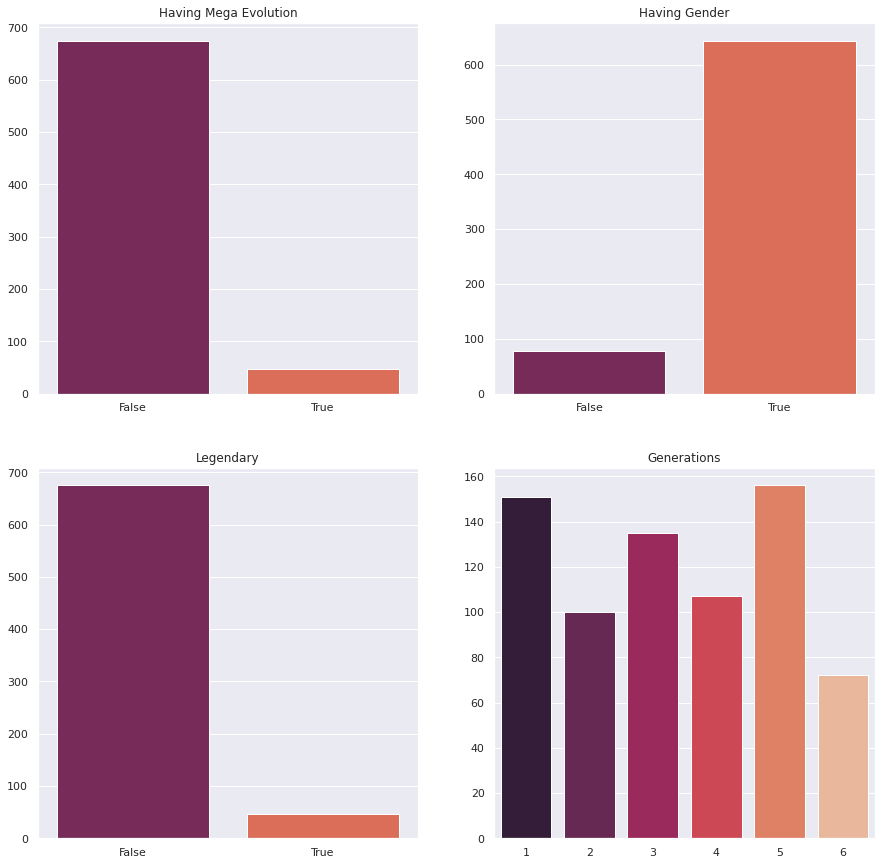

In [ ]:
has_mega = data['hasMegaEvolution'].value_counts()
has_gender = data['hasGender'].value_counts()
isLegendary = data['isLegendary'].value_counts()
generations = data['Generation'].value_counts()

fig3,((ax5,ax6),(ax7,ax8)) = plt.subplots(nrows=2,ncols = 2)
fig3.set_size_inches(15,15)
sns.barplot(x=has_mega.index,y=has_mega.values, ax= ax5,palette='rocket').set_title('Having Mega Evolution')
sns.barplot(x=has_gender.index,y=has_gender.values, ax= ax6,palette='rocket').set_title('Having Gender')
sns.barplot(x=isLegendary.index,y=isLegendary.values,ax=ax7,palette='rocket').set_title('Legendary')
sns.barplot(x=generations.index,y=generations.values,ax=ax8,palette='rocket').set_title("Generations")
sns.set_theme(style='darkgrid')
fig3.show()

**Body Style & Colour**

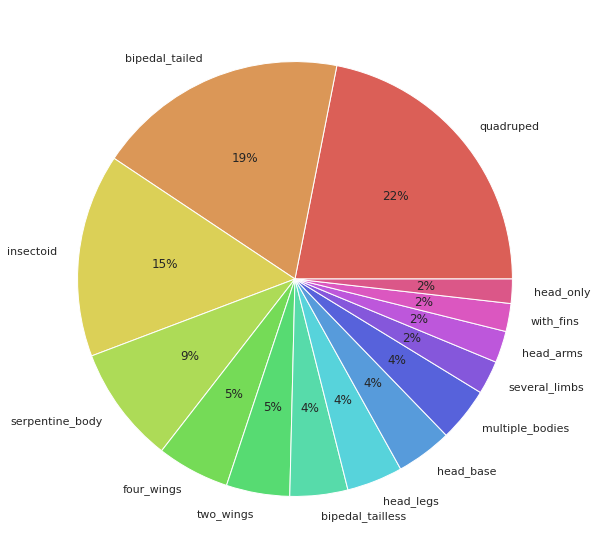

In [ ]:
count = data['Body_Style'].value_counts()
labels = data['Body_Style'].unique()
length = len(labels)
colours = sns.color_palette('hls',14)[0:length]
plt.figure(figsize=(10,10))
plt.pie(count,labels=labels,colors=colours,autopct='%.0f%%')
plt.show()

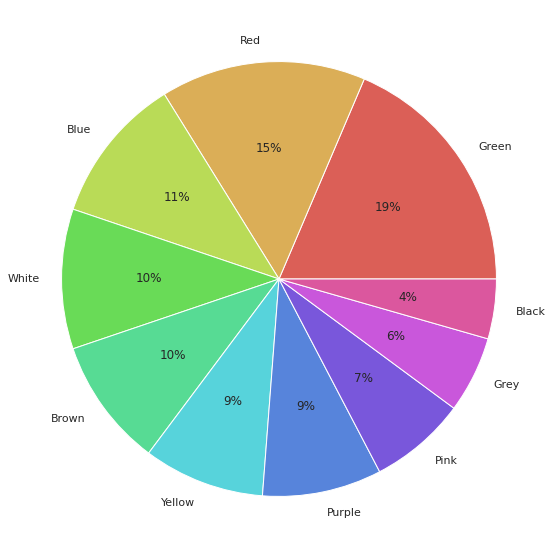

In [ ]:
count = data['Color'].value_counts()
labels = data['Color'].unique()
length = len(labels)
colours = sns.color_palette('hls',10)[0:length]
plt.figure(figsize=(10,10))
plt.pie(count,labels=labels,colors=colours,autopct='%.0f%%')
plt.show()

# **Create Training & Test Sets**

In [ ]:
# Weight and Height are highly correlated, use BMI instead 
data['BMI'] = data['Weight_kg']/(data['Height_m'] ** 2)
# Convert categorical variables to dummy variables 
data[data.loc[:, data.dtypes == 'bool'].columns] = data.loc[:,data.dtypes == 'bool'].astype(int)
data

,Name,Type_1,Type_2,Total,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,...,hasGender,Pr_Male,Egg_Group_1,Egg_Group_2,hasMegaEvolution,Height_m,Weight_kg,Catch_Rate,Body_Style,BMI
Number,,,,,,,,,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,...,1,0.875,Monster,Grass,0,0.71,6.9,45,quadruped,13.687760
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,...,1,0.875,Monster,Grass,0,0.99,13.0,45,quadruped,13.263953
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,...,1,0.875,Monster,Grass,1,2.01,100.0,45,quadruped,24.751863
4,Charmander,Fire,No Second Typing,309,39,52,43,60,50,65,...,1,0.875,Monster,Dragon,0,0.61,8.5,45,bipedal_tailed,22.843322
5,Charmeleon,Fire,No Second Typing,405,58,64,58,80,65,80,...,1,0.875,Monster,Dragon,0,1.09,19.0,45,bipedal_tailed,15.991920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717,Yveltal,Dark,Flying,680,126,131,95,131,98,99,...,0,-1.000,Undiscovered,No Secondary Egg Group,0,5.79,203.0,45,two_wings,6.055345
718,Zygarde,Dragon,Ground,600,108,100,121,81,95,95,...,0,-1.000,Undiscovered,No Secondary Egg Group,0,5.00,305.0,3,serpentine_body,12.200000
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,...,0,-1.000,Undiscovered,No Secondary Egg Group,1,0.71,8.8,3,head_arms,17.456854


**Feature Selection**

In [ ]:
data.columns

Index(['Name', 'Type_1', 'Type_2', 'Total', 'HP', 'Attack', 'Defense',
       'Sp_Atk', 'Sp_Def', 'Speed', 'Generation', 'isLegendary', 'Color',
       'hasGender', 'Pr_Male', 'Egg_Group_1', 'Egg_Group_2',
       'hasMegaEvolution', 'Height_m', 'Weight_kg', 'Catch_Rate', 'Body_Style',
       'BMI'],
      dtype='object')

In [ ]:
column_lst = ['HP','Attack','Defense','Sp_Atk','Sp_Def','Speed','hasGender',
              'hasMegaEvolution','BMI','Catch_Rate']
X = data.loc[:,data.columns.isin(column_lst)]
y = data['isLegendary']
X

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,hasGender,hasMegaEvolution,Catch_Rate,BMI
Number,,,,,,,,,,
1,45,49,49,65,65,45,1,0,45,13.687760
2,60,62,63,80,80,60,1,0,45,13.263953
3,80,82,83,100,100,80,1,1,45,24.751863
4,39,52,43,60,50,65,1,0,45,22.843322
5,58,64,58,80,65,80,1,0,45,15.991920
...,...,...,...,...,...,...,...,...,...,...
717,126,131,95,131,98,99,0,0,45,6.055345
718,108,100,121,81,95,95,0,0,3,12.200000
719,50,100,150,100,150,50,0,1,3,17.456854


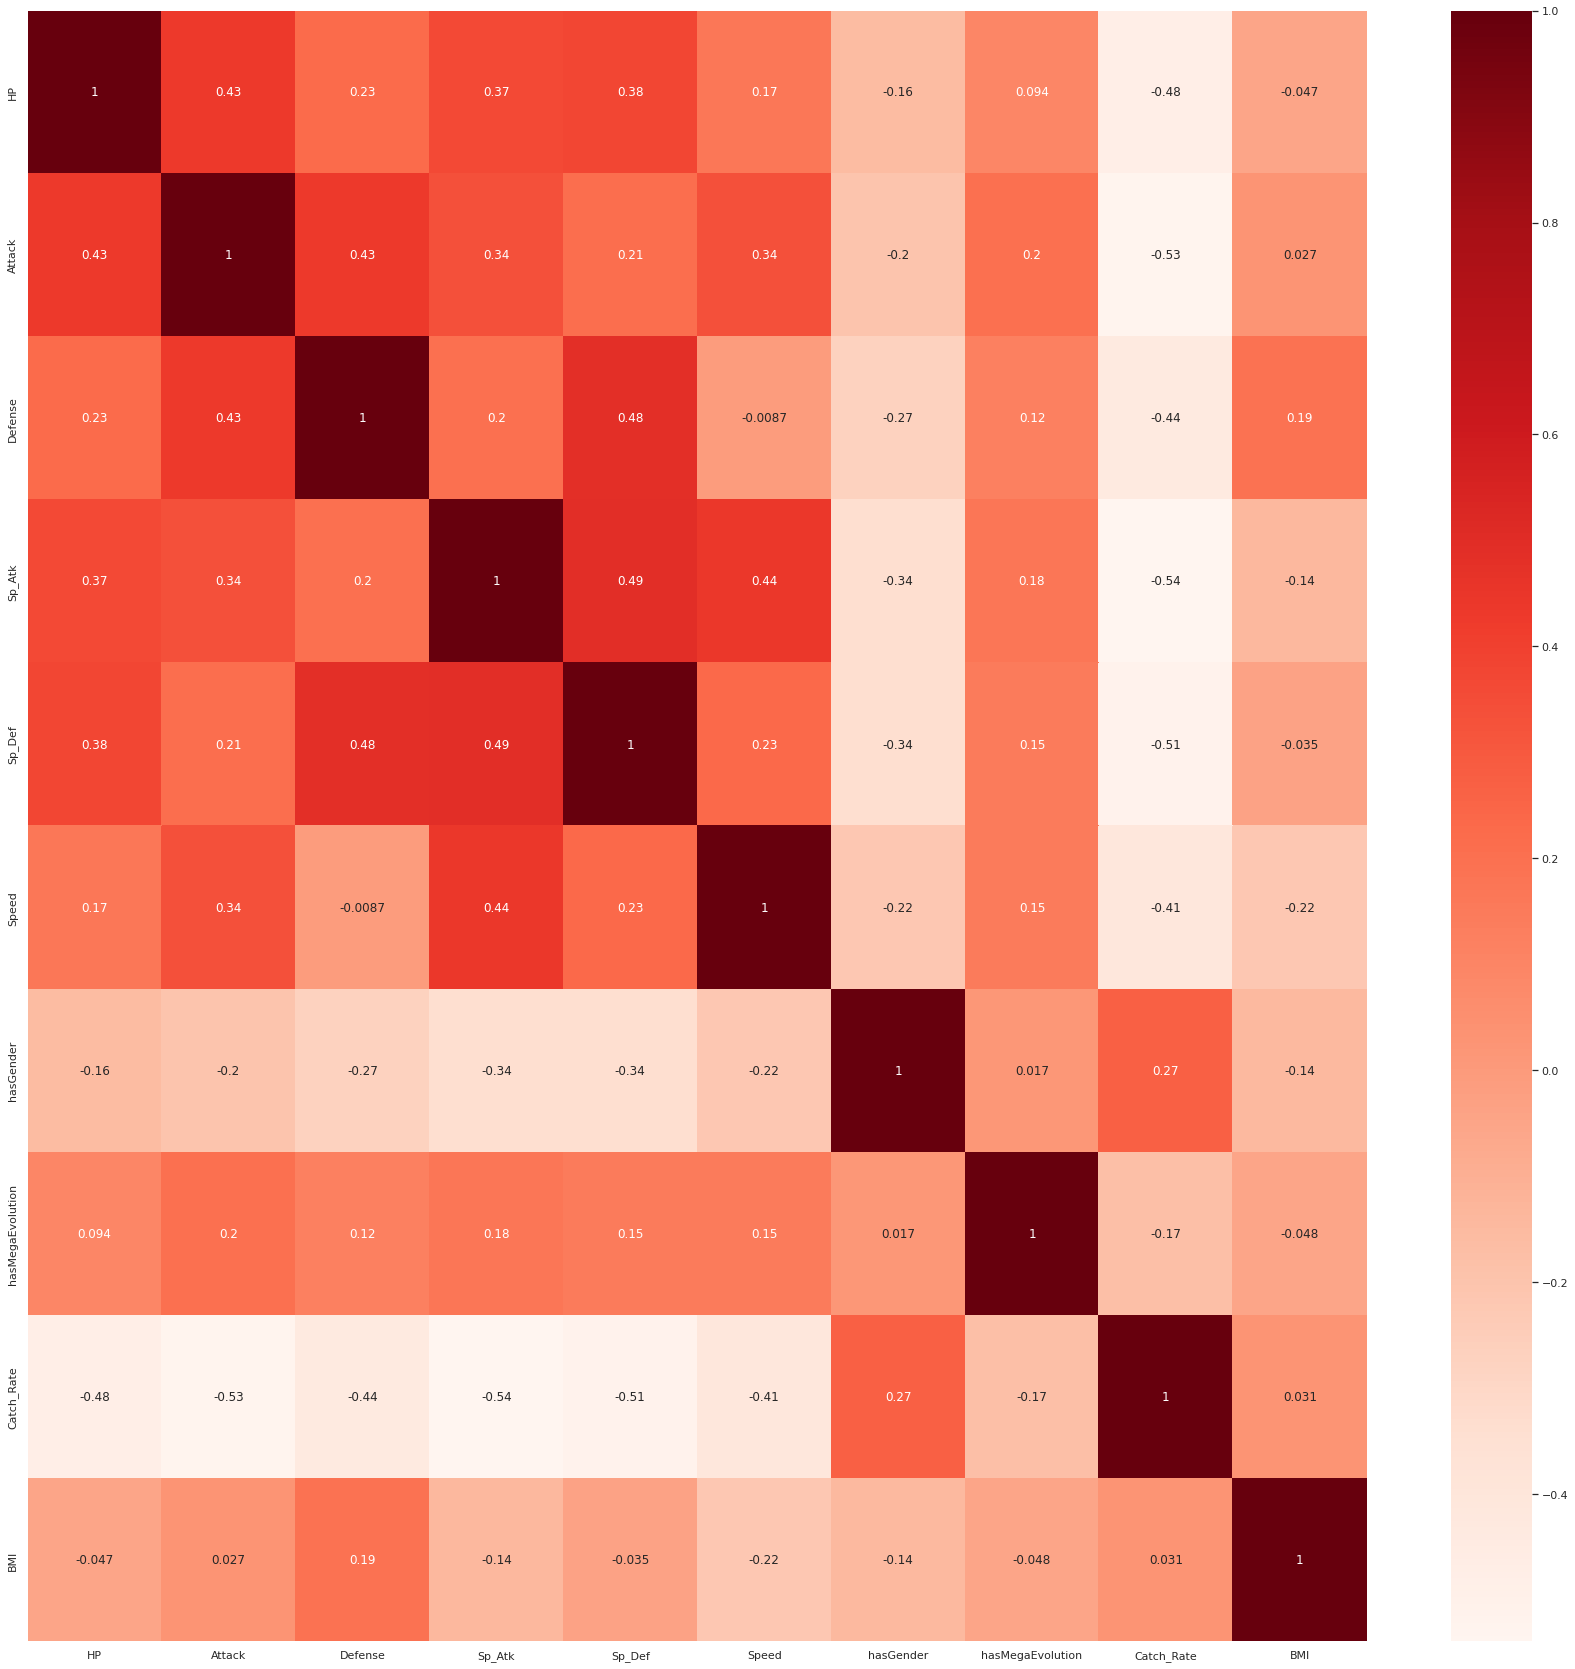

In [ ]:
plt.figure(figsize=(30,30))
cor = X.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
# There are no longer any highly correlated variables 
plt.show()

**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,
                                                 random_state = 4212,
                                                 shuffle = True)
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)
print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(576, 10)
(576,)

#### Testing Data shape ####
(145, 10)
(145,)


In [ ]:
X_train.describe()

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,hasGender,hasMegaEvolution,Catch_Rate,BMI
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,68.651042,74.956597,70.993056,67.970486,68.906250,65.855903,0.897569,0.059028,99.331597,40.000663
std,25.938283,29.170083,30.139386,28.515701,27.004056,27.144542,0.303477,0.235882,76.135002,40.968999
min,10.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000,0.000000,3.000000,0.039062
25%,50.000000,53.000000,50.000000,45.000000,50.000000,45.000000,1.000000,0.000000,45.000000,20.778571
50%,65.000000,73.500000,65.000000,62.000000,65.000000,65.000000,1.000000,0.000000,62.500000,30.049485
75%,80.000000,95.000000,88.000000,87.000000,85.000000,85.000000,1.000000,0.000000,162.500000,42.942071
max,255.000000,165.000000,230.000000,150.000000,230.000000,160.000000,1.000000,1.000000,255.000000,366.666667


In [ ]:
y_train.describe()

count    576.000000
mean       0.067708
std        0.251463
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: isLegendary, dtype: float64

**Scale Training Set**

In [ ]:
from sklearn.preprocessing import MinMaxScaler # for feature scaling
sc = MinMaxScaler()
x_train = sc.fit_transform(X_train)
x_test = sc.transform(X_test)

# **Training Different Legendary Classifiers**

**Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_squared_error 

log_model = LogisticRegression(penalty = 'none',random_state = 4212,
                                   solver = 'lbfgs',max_iter = 250,
                                   verbose = 1)
log_model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=250, penalty='none', random_state=4212, verbose=1)

**Compute Accuracy of Model Over**


1.   Training Set 
2.   Test Set 




In [ ]:
from sklearn.metrics import confusion_matrix

train_predictions = log_model.predict(x_train)
test_predictions = log_model.predict(x_test)

def calculating_accuracy(train_predictions,test_predictions):
  train_accuracy = np.mean(train_predictions == y_train.values)
  print("The training accuracy is " + str(train_accuracy * 100) + "%")
  test_accuracy = np.mean(test_predictions == y_test.values)
  print("The test accuracy is " + str(test_accuracy * 100) + "%")

  return test_accuracy * 100

log_accuracy = calculating_accuracy(train_predictions,test_predictions)

The training accuracy is 99.65277777777779%
The test accuracy is 97.24137931034483%


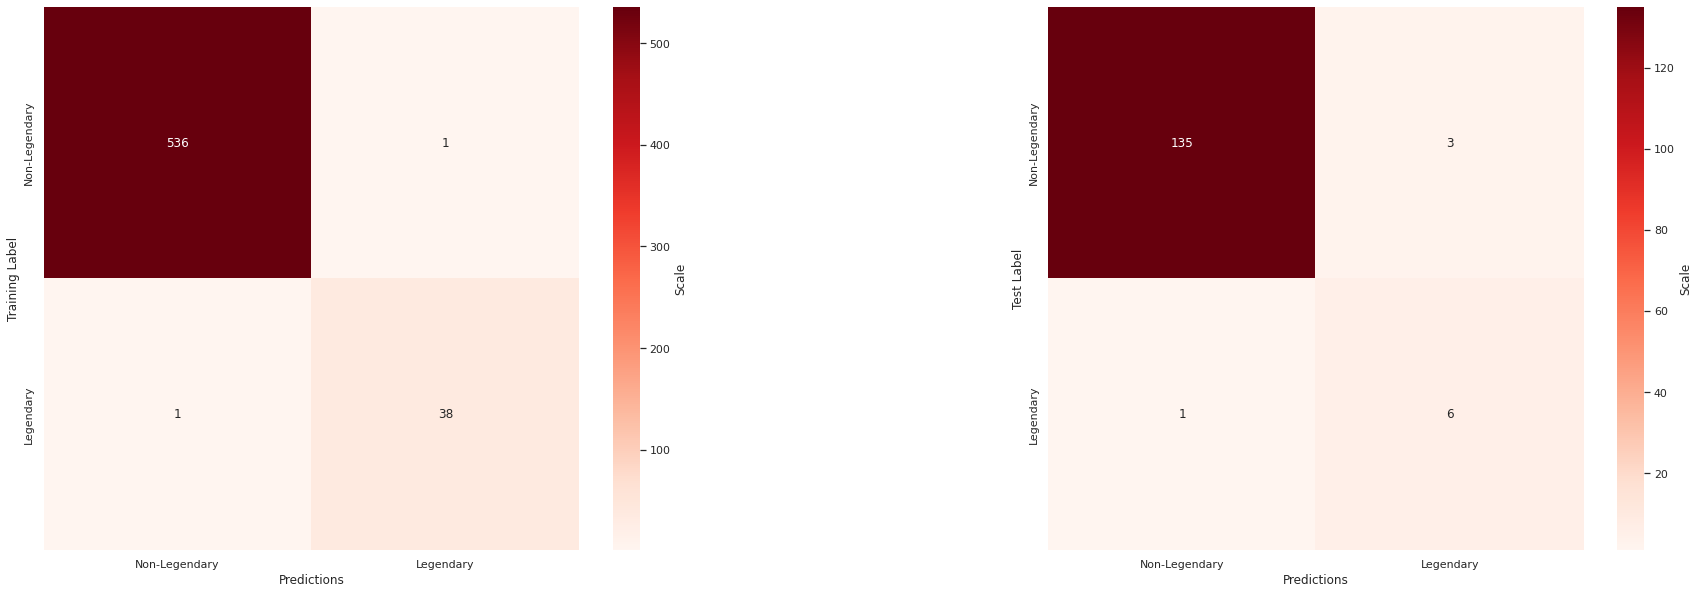

In [ ]:
from sklearn.metrics import confusion_matrix
labels = ["Non-Legendary","Legendary"]

def plot_confusion_matrix(train_predictions,test_predictions,labels = labels):
  cm_train = confusion_matrix(y_train,train_predictions)
  cm_test = confusion_matrix(y_test,test_predictions)
  fig,(ax1,ax2) = plt.subplots(ncols=2)
  fig.set_size_inches(30,10)
  fig.subplots_adjust(hspace=0.5, wspace=0.5)

  # Training Performance 
  sns.heatmap(cm_train,annot=True, cmap=plt.cm.Reds,fmt='d',
              cbar_kws={'label': 'Scale'},ax = ax1)
  ax1.set_xticklabels(labels)
  ax1.set_yticklabels(labels)
  ax1.set(ylabel="Training Label",xlabel="Predictions")
  
  # Test Performance 
  sns.heatmap(cm_test,annot=True, cmap=plt.cm.Reds,fmt='d',
              cbar_kws={'label': 'Scale'},ax = ax2)
  ax2.set_xticklabels(labels)
  ax2.set_yticklabels(labels)
  ax2.set(ylabel="Test Label",xlabel="Predictions")

  fig.show()

plot_confusion_matrix(train_predictions,test_predictions)

**Logistic Regression With l2 Regularization**

In [ ]:
reg_log_model = LogisticRegression(penalty = 'l2',tol=0.0001, C=1.0,
                                   random_state = 4212,
                                   solver = 'lbfgs',max_iter = 250,
                                   verbose = 1)
reg_log_model.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=250, random_state=4212, verbose=1)

**Calculate Model Accuracy Over**

1.   Train Set
2.   Test Set 



**Model Accuracy**

In [ ]:
reg_log_accuracy = calculating_accuracy(train_predictions,test_predictions)
# There some slight overfitting using vanilla log regression as model accuracy 
# improved by 0.7% 

The training accuracy is 99.65277777777779%
The test accuracy is 97.24137931034483%


**Confusion Matrix**

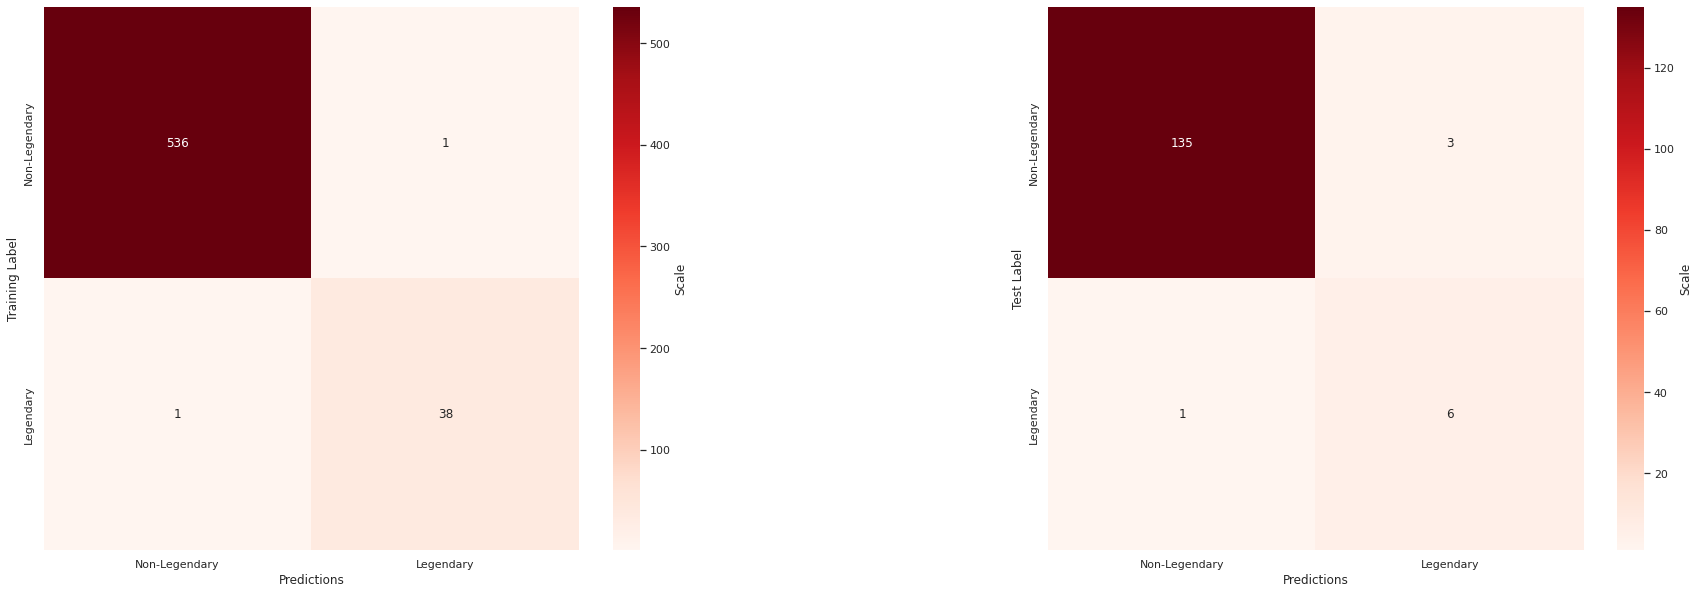

In [ ]:
plot_confusion_matrix(train_predictions,test_predictions)

**Support Vector Machine (SVM) with Linear Kernel**

In [ ]:
from sklearn import svm
lin_svm = svm.SVC(C = 1.,kernel='linear',tol=0.0001,verbose=1,
                  random_state=4212,max_iter=250)
lin_svm.fit(x_train,y_train)

[LibSVM]

SVC(kernel='linear', max_iter=250, random_state=4212, tol=0.0001, verbose=1)

**Calculate Model Accuracy Over**

1.   Train Set
2.   Test Set 


**Accuracy**

In [ ]:
train_predictions = lin_svm.predict(x_train)
test_predictions = lin_svm.predict(x_test)
lin_svm_accuracy = calculating_accuracy(train_predictions,test_predictions)

The training accuracy is 98.09027777777779%
The test accuracy is 97.93103448275862%


**Confusion Matrix**

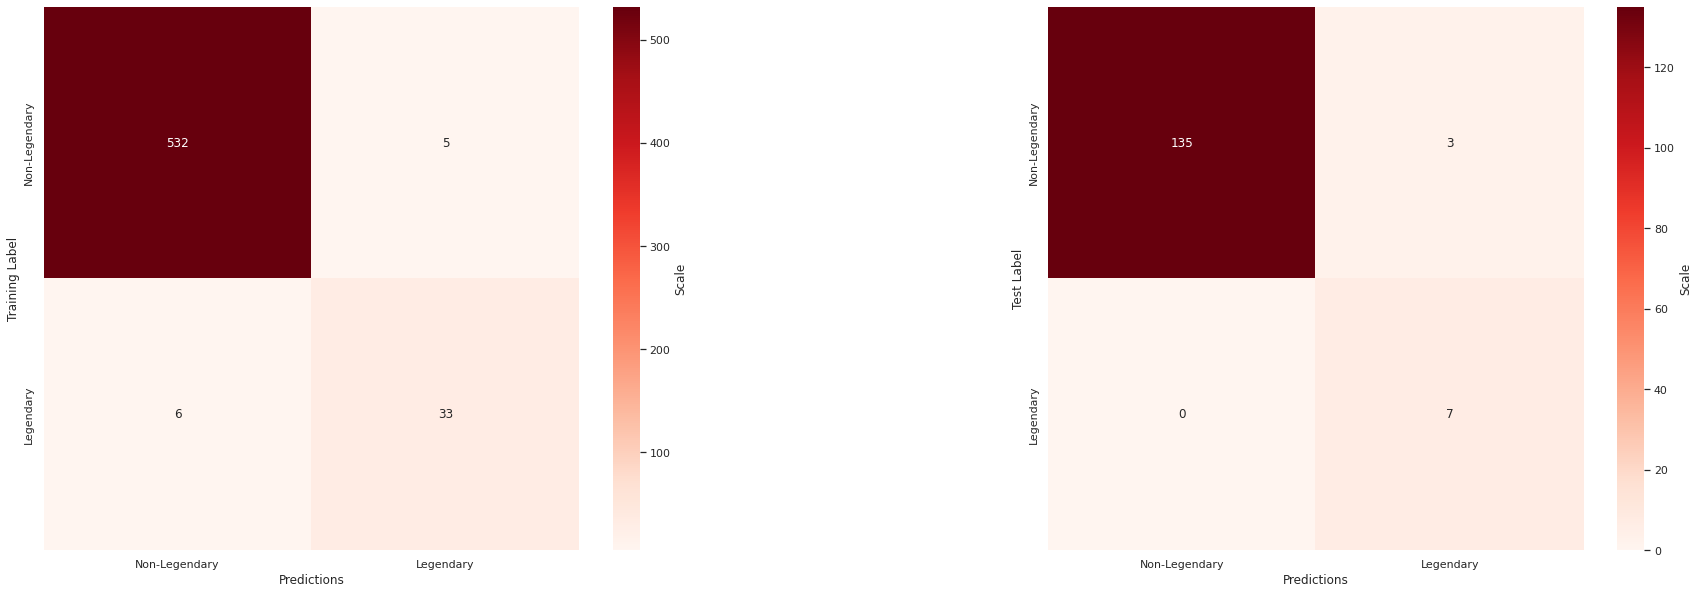

In [ ]:
plot_confusion_matrix(train_predictions,test_predictions)

**SVM with RBF Kernel**

In [ ]:
rbf_svm = svm.SVC(C = 1.,kernel='rbf',tol=0.0001,verbose=1,
                  random_state=4212,max_iter=250)
rbf_svm.fit(x_train,y_train)

[LibSVM]

SVC(max_iter=250, random_state=4212, tol=0.0001, verbose=1)

**Calculate Model Accuracy Over**

1.   Train Set
2.   Test Set



**Accuracy**

In [ ]:
train_predictions = rbf_svm.predict(x_train)
test_predictions = rbf_svm.predict(x_test)
rbf_svm_accuracy = calculating_accuracy(train_predictions,test_predictions)

The training accuracy is 98.26388888888889%
The test accuracy is 97.24137931034483%


**Confusion Matrix**

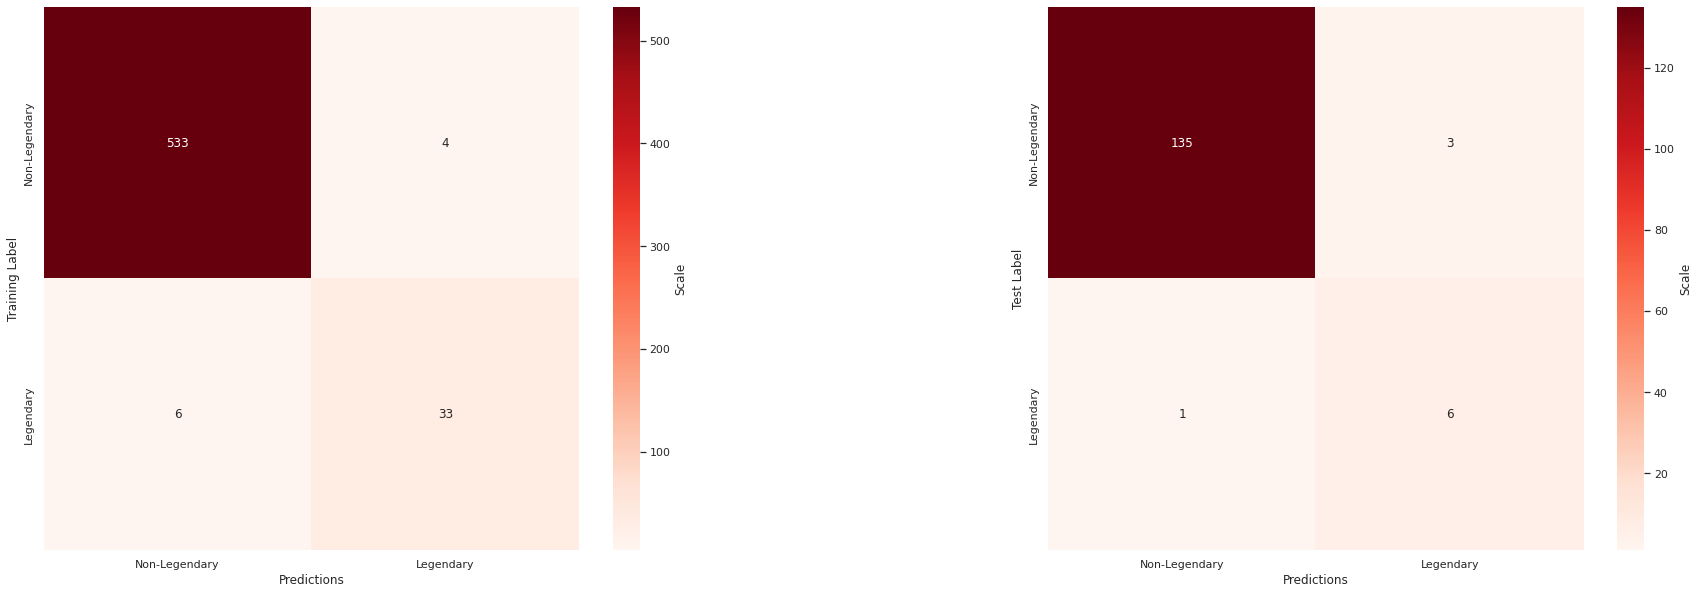

In [ ]:
plot_confusion_matrix(train_predictions,test_predictions)

**SVM with Polynomial Kernel (degree 3)**

In [ ]:
poly_svm = svm.SVC(C = 1.,kernel='poly',tol=0.0001,verbose=1,
                  random_state=4212,max_iter=250)
poly_svm.fit(x_train,y_train)

[LibSVM]

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning:

Solver terminated early (max_iter=250).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



SVC(kernel='poly', max_iter=250, random_state=4212, tol=0.0001, verbose=1)

**Calculating Model Accuracy Over**

1.   Train Set 
2.   Test Set



In [ ]:
train_predictions = poly_svm.predict(x_train)
test_predictions = poly_svm.predict(x_test)
poly_svm_accuracy = calculating_accuracy(train_predictions,test_predictions)

The training accuracy is 99.47916666666666%
The test accuracy is 97.24137931034483%


**Confusion Matrix**

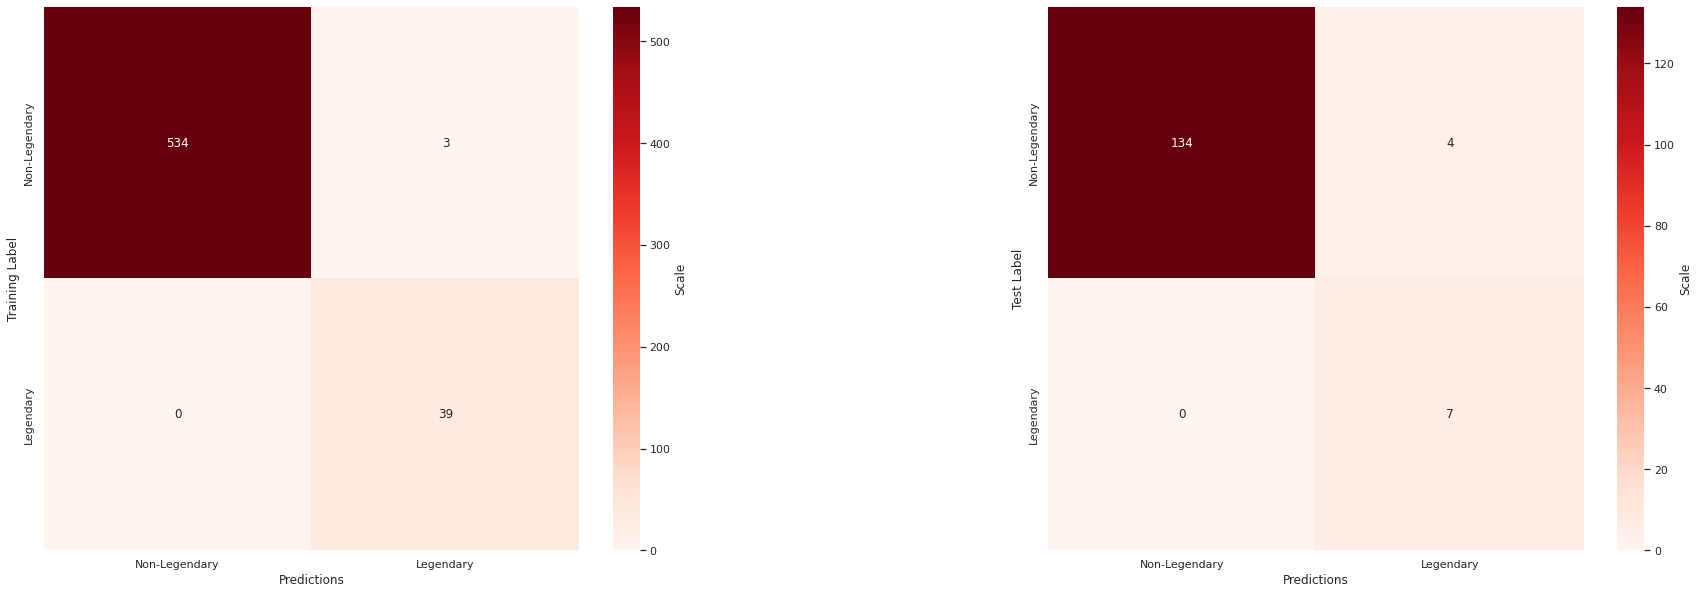

In [ ]:
plot_confusion_matrix(train_predictions,test_predictions)

**Multi-Layer Peceptron**

In [ ]:
def build_MLP_model(hp):
  best_model = Sequential()
  dimension = [i+1 for i in range(1,256)]
  # Tune the dimensions of each layer 
  best_model.add(Dense(hp.Choice('units1',dimension),activation='relu'))
  best_model.add(Dense(hp.Choice('units2',dimension),activation='relu'))
  best_model.add(Dense(hp.Choice('units3',dimension),activation='relu'))

  # Output layer 
  best_model.add(Dense(1,activation='sigmoid'))

  # Tune the learning rate as well 
  momentum_lst = np.arange(0,1,0.1).tolist()
  momentum_info = hp.Choice('momentum',momentum_lst)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-1,1e-2, 1e-3,1e-4])

  # compile the model 
  best_model.compile(optimizer=keras.optimizers.SGD(learning_rate=hp_learning_rate,
                                                    momentum=momentum_info),
                     loss='binary_crossentropy',metrics = ['accuracy'])


  return best_model 

**Callbacks to Speed Up Training**

In [ ]:
# Stop training if validation loss does not improve after 5 epochs 
callback_early_stopping = EarlyStopping(monitor='loss',min_delta = 0.001, 
                                        patience=10, verbose=1)

# Reduce the learning rate by a factor of 0.1 if validaiton has not 
# improved since last epoch 
callback_reduce_lr = ReduceLROnPlateau(monitor='loss',min_delta = 0.001,
                                       factor=0.1,
                                       min_lr=1e-10,
                                       patience=5,
                                       verbose=1)

callbacks = [callback_early_stopping,callback_reduce_lr]

**Hyperparameter Tuning**

In [ ]:
MLP_tuner = kt.BayesianOptimization(build_MLP_model,objective = 'val_accuracy',
                                    max_trials = 10,
                                   num_initial_points = 2,alpha = 0.0001,
                                    beta = 2.6,seed = 4212,overwrite = True)

MLP_tuner.search(X_train,y_train,verbose = 1,epochs = 500,validation_data = (x_test,y_test),
                callbacks = callbacks)

MLP_best_model = MLP_tuner.get_best_models()[0]

Trial 10 Complete [00h 00m 12s]
val_accuracy: 0.951724112033844

Best val_accuracy So Far: 0.9724137783050537
Total elapsed time: 00h 01m 41s
INFO:tensorflow:Oracle triggered exit


**Model Accuracy**

In [ ]:
def making_classification(data,model = MLP_best_model):
  predictions = (model.predict(data) > 0.5).astype("int32")
  x,_ = predictions.shape
  predictions = predictions.reshape(x,)
  return predictions 

train_predictions = making_classification(x_train)
test_predictions = making_classification(x_test)
MLP_accuracy = calculating_accuracy(train_predictions,
                                    test_predictions)

The training accuracy is 93.75%
The test accuracy is 97.24137931034483%


**Confusion Matrix**

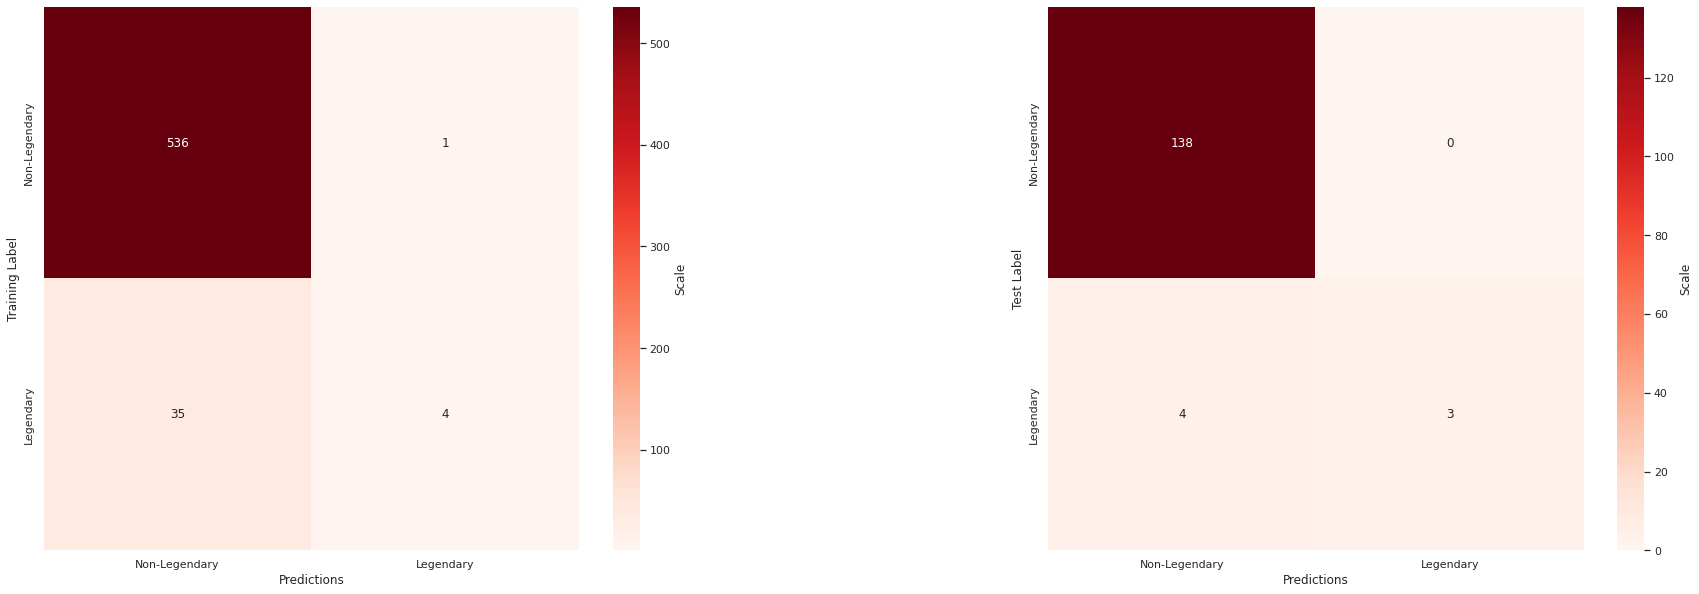

In [ ]:
plot_confusion_matrix(train_predictions,test_predictions)

**Model Evaluation**

In [ ]:
test_accuracy = pd.DataFrame(columns=['Logistic Regression',
                                      'L2 Logistic Regression',
                                      'Linear SVM','RBF SVM','Poly SVM','MLP'])
test_accuracy.loc[0] = [log_accuracy,reg_log_accuracy,lin_svm_accuracy,
                        rbf_svm_accuracy,poly_svm_accuracy,MLP_accuracy]
test_accuracy

,Logistic Regression,L2 Logistic Regression,Linear SVM,RBF SVM,Poly SVM,MLP
0,97.241379,97.241379,97.931034,97.241379,97.241379,97.241379


**Check if your favourite Pokemon is Legendary**

**Non-Legendary**

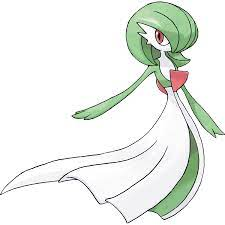

In [ ]:
pokemon = 'Gardevoir'
Poke_info = X[data['Name'] == pokemon]
Poke_info

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,hasGender,hasMegaEvolution,Catch_Rate,BMI
Number,,,,,,,,,,
282,68,65,65,125,115,80,1,1,45,18.90625


In [ ]:
def is_Legendary(pokemon,original_data = data,model_data = X,scaler = sc,
                 best_model = lin_svm):
  Poke_info = model_data[original_data['Name'] == pokemon]
  poke_attributes = scaler.transform(Poke_info)
  isLegendary = best_model.predict(poke_attributes)[0]
  if isLegendary == 1:
    return "Legendary"
  else:
    return "not Legendary"
status = is_Legendary(pokemon)
print(pokemon + " is " + status)

Gardevoir is not Legendary


**Legendary**

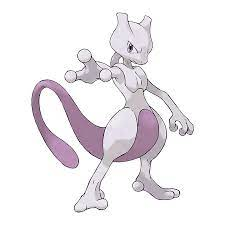

In [ ]:
pokemon = 'Mewtwo'
Poke_info = X[data['Name'] == pokemon]
Poke_info

,HP,Attack,Defense,Sp_Atk,Sp_Def,Speed,hasGender,hasMegaEvolution,Catch_Rate,BMI
Number,,,,,,,,,,
150,106,110,90,154,90,130,0,1,3,30.197272


In [ ]:
status = is_Legendary(pokemon)
print(pokemon + " is " + status)

Mewtwo is Legendary
